Bike sharing polynomial features
---

Exercise - Load and split the data, set the baseline
---

> **Exercise**: Load the dataset. Encode categorical variables with one-hot encoding. Split the data into train/test sets with the `train_test_split()` function from Scikit-learn (50-50 split, `random_state=0`). Fit a linear regression and compare its performance to the median baseline using the mean absolute error (MAE) measure.

In [6]:
import pandas as pd

# Load data
data_df =  pd.read_csv("c3_bike-sharing-data.csv")
data_df.head()

,temp,hum,windspeed,yr,workingday,holiday,weekday,season,weathersit,casual
0,0.344,0.806,0.160,2011,no,no,6,spring,cloudy,331
1,0.363,0.696,0.249,2011,no,no,0,spring,cloudy,131
2,0.196,0.437,0.248,2011,yes,no,1,spring,clear,120
3,0.200,0.590,0.160,2011,yes,no,2,spring,clear,108
4,0.227,0.437,0.187,2011,yes,no,3,spring,clear,82


In [8]:
# Encode categorical variables
encoded_df = pd.get_dummies(data_df, columns=["weekday"], drop_first=True) #remove weekday_0
encoded_df = pd.get_dummies(encoded_df , columns=["season"], drop_first=True)#remove season_fall
encoded_df = pd.get_dummies(encoded_df , columns=["weathersit"], drop_first=True)#remove weathersit_clear
encoded_df.head



<bound method NDFrame.head of       temp    hum  windspeed    yr workingday holiday  casual  weekday_1  \
0    0.344  0.806      0.160  2011         no      no     331          0   
1    0.363  0.696      0.249  2011         no      no     131          0   
2    0.196  0.437      0.248  2011        yes      no     120          1   
3    0.200  0.590      0.160  2011        yes      no     108          0   
4    0.227  0.437      0.187  2011        yes      no      82          0   
..     ...    ...        ...   ...        ...     ...     ...        ...   
726  0.254  0.653      0.350  2012        yes      no     247          0   
727  0.253  0.590      0.155  2012        yes      no     644          0   
728  0.253  0.753      0.124  2012         no      no     159          0   
729  0.256  0.483      0.351  2012         no      no     364          0   
730  0.216  0.578      0.155  2012        yes      no     439          1   

     weekday_2  weekday_3  weekday_4  weekday_5  weekday_

In [14]:
# One-hot encoding
encoded_df = pd.get_dummies(
    data_df, columns=["yr", "workingday", "holiday", "weekday", "season", "weathersit"]
)
encoded_df.head()

,temp,hum,windspeed,casual,yr_2011,yr_2012,workingday_no,workingday_yes,holiday_no,holiday_yes,...,weekday_4,weekday_5,weekday_6,season_fall,season_spring,season_summer,season_winter,weathersit_clear,weathersit_cloudy,weathersit_rainy
0,0.344,0.806,0.160,331,1,0,1,0,1,0,...,0,0,1,0,1,0,0,0,1,0
1,0.363,0.696,0.249,131,1,0,1,0,1,0,...,0,0,0,0,1,0,0,0,1,0
2,0.196,0.437,0.248,120,1,0,0,1,1,0,...,0,0,0,0,1,0,0,1,0,0
3,0.200,0.590,0.160,108,1,0,0,1,1,0,...,0,0,0,0,1,0,0,1,0,0
4,0.227,0.437,0.187,82,1,0,0,1,1,0,...,0,0,0,0,1,0,0,1,0,0


In [15]:
# Split into train/test sets
from sklearn.model_selection import train_test_split

# Split data
encoded_df_tr, encoded_df_te = train_test_split(
    encoded_df, train_size=0.7, test_size=0.3, random_state=0 # correction 0.5 0.5
)

In [16]:
# Create X/y variables
X_tr = encoded_df_tr.drop("casual", axis=1).values
y_tr = encoded_df_tr.casual.values

X_te = encoded_df_te.drop("casual", axis=1).values
y_te = encoded_df_te.casual.values

In [17]:
from sklearn.linear_model import LinearRegression, Ridge

# Function to fit the model
def fit_model(X_train, y_train, X_test):
    # Create the model
    # Note: Using ridge with a small alpha to avoid ill-conditioning issues
    model = Ridge(alpha=1e-4)  # or LinearRegression()

    # Fit it to train data
    model.fit(X_train, y_train)

    # Compute predictions for test set
    y_pred = np.maximum(model.predict(X_test), 50)  # set a lower limit

    return y_pred

In [18]:
import numpy as np

# Mean absolute error (MAE)
def MAE(y, y_pred):
    return np.mean(np.abs(y - y_pred))

In [19]:
# Median baseline
mae_baseline = MAE(y_te, np.median(y_tr))

# Linear regression
y_pred = fit_model(X_tr, y_tr, X_te)
mae_lr = MAE(y_te, y_pred)

print("MAE baseline: {:.3f}".format(mae_baseline))
print("MAE linear regression: {:.3f}".format(mae_lr))

MAE baseline: 523.468
MAE linear regression: 261.067


Exercise - Add polynomial features
---

> **Exercise**: Add the `temp^2` and `temp^3` polynomial features. Then fit and evaluate a linear regression. Plot your model with a scatter plot of temperatures vs. number of users. Feel free to add other features.

In [21]:
# Function to add features
def create_features(df):
    temp = df.temp.values
    others = df.drop(["temp", "casual"], axis=1).values
    return np.c_[temp, temp ** 2, temp ** 3, others]

In [23]:
# Add polynomial features
# Create new input matrices
X_tr2 = create_features(encoded_df_tr)
X_te2 = create_features(encoded_df_te)

# Fit a linear regression
y_pred_lr = fit_model(X_tr2, y_tr, X_te2)
mae_lr2 = MAE(y_te, y_pred_lr)
print("MAE lr with new features: {:.3f}".format(mae_lr2))

MAE lr with new features: 240.498


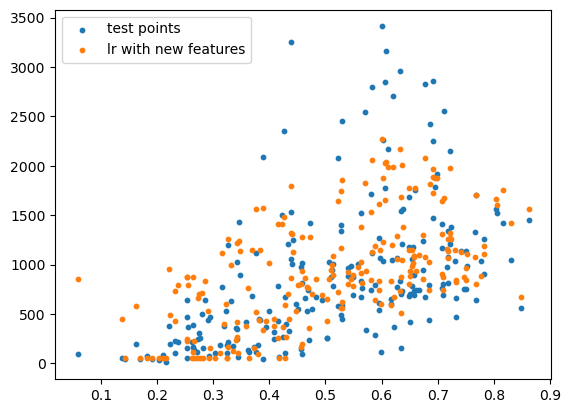

In [25]:
# Plot predictions
%matplotlib inline
import matplotlib.pyplot as plt

plt.scatter(encoded_df_te.temp,encoded_df_te.casual, s=10, label="test points")
plt.scatter(encoded_df_te.temp, y_pred_lr, s=10, label="lr with new features")
plt.legend()
plt.show()

Exercise - Separate sources
---

In the last exercise, we saw that we can identify two sources in the data.

1. Data points collected during working days
1. Data points collected during non-working days

The goal of this exercise is to create a model for each source using your extended set of features, e.g., the original features plus the `temp^2`, `temp^3` polynomial features.

> **Exercise**: Create a model for each source with the extended set of features, and evaluate the overall performance on the test set using MAE. Plot the two models with a scatter plot of temperatures vs. number of users. Create a final comparison using a bar chart.

In [26]:
# Separate data points
# Split data into working days (wd) and non-working days (nwd)
train_df_wd = encoded_df_tr[encoded_df_tr.workingday_yes == 1]
train_df_nwd = encoded_df_tr[encoded_df_tr.workingday_yes == 0]

test_df_wd = encoded_df_te[encoded_df_te.workingday_yes == 1]
test_df_nwd = encoded_df_te[encoded_df_te.workingday_yes == 0]

In [27]:
# Fit two linear regressions:
## Fit a linear regression for working days (wd)
y_pred_wd = fit_model(
    create_features(train_df_wd), train_df_wd.casual, create_features(test_df_wd)
)

## and one for non-working days (nwd)
y_pred_nwd = fit_model(
    create_features(train_df_nwd), train_df_nwd.casual, create_features(test_df_nwd)
)

# Reassemble predictions
y_pred_wdnwd = np.concatenate([y_pred_wd, y_pred_nwd])
y_te_wdnwd = np.concatenate([test_df_wd.casual, test_df_nwd.casual])
# Compute overall performance with MAE
mae_wdnwd = MAE(y_te_wdnwd, y_pred_wdnwd)
print('MAE two sources: {:.3f}'.format(mae_wdnwd))

MAE two sources: 180.702


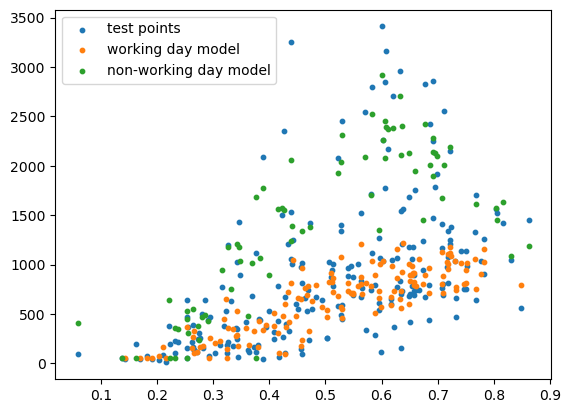

In [28]:
# Plot predictions
temp_te_wdnwd = np.concatenate([test_df_wd.temp, test_df_nwd.temp])
plt.scatter(temp_te_wdnwd, y_te_wdnwd, s=10, label="test points")
plt.scatter(test_df_wd.temp, y_pred_wd, s=10, label="working day model")
plt.scatter(test_df_nwd.temp, y_pred_nwd, s=10, label="non-working day model")

plt.legend()
plt.show()

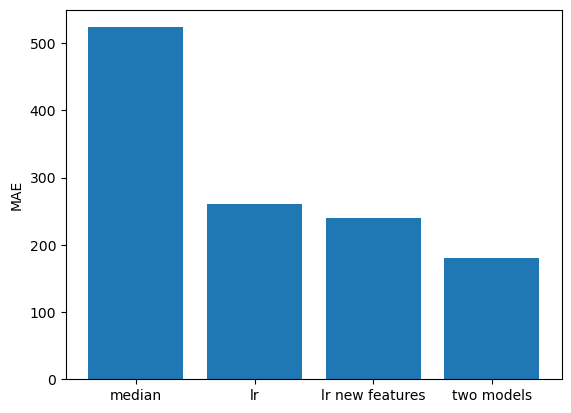

In [29]:
# Final comparison
mae_values = [mae_baseline, mae_lr, mae_lr2, mae_wdnwd]
titles = ["median", "lr", "lr new features", "two models"]

plt.bar(titles, mae_values)

plt.ylabel("MAE")
plt.show()